In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
!wget https://www.dropbox.com/scl/fi/9rpuyozcm7vdv0m1l0y7z/PokemonDataset.zip?rlkey=pnuu2mc5b4s85p12w7nm2umcr&dl=0 -O data

/bin/bash: line 1: -O: command not found
--2023-08-14 20:41:27--  https://www.dropbox.com/scl/fi/9rpuyozcm7vdv0m1l0y7z/PokemonDataset.zip?rlkey=pnuu2mc5b4s85p12w7nm2umcr
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/9rpuyozcm7vdv0m1l0y7z/PokemonDataset.zip?rlkey=pnuu2mc5b4s85p12w7nm2umcr [following]
--2023-08-14 20:41:27--  https://www.dropbox.com/e/scl/fi/9rpuyozcm7vdv0m1l0y7z/PokemonDataset.zip?rlkey=pnuu2mc5b4s85p12w7nm2umcr
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc29c2948e024f320c1ea6f61bd.dl.dropboxusercontent.com/cd/0/get/CBzOWR99eqMkDYmSrH0mWFeyekHUEMJcYq9LRS_8CDceGuiX3AftGZaj5yygKl5ymkksrvqKy9Y1ScFuIJA_D0A_QXAM_6zGc_3Skho3mke3FIjJrHbm2-lkZKb2PXtQhKDLjbsh9z5gLStW6LbXEgMS/file# [following

In [3]:
! unzip PokemonDataset.zip?rlkey=pnuu2mc5b4s85p12w7nm2umcr -d "images/"

Archive:  PokemonDataset.zip?rlkey=pnuu2mc5b4s85p12w7nm2umcr
mapname:  conversion of  failed
   creating: images/Test/
   creating: images/Train/
   creating: images/Test/Pikachu/
   creating: images/Train/Pikachu/
   creating: images/Test/Bulbasaur/
   creating: images/Train/Bulbasaur/
   creating: images/Test/Charmander/
   creating: images/Train/Charmander/
 extracting: images/Train/Pikachu/345.jpg  
 extracting: images/Train/Pikachu/335.jpg  
 extracting: images/Train/Pikachu/299.jpg  
 extracting: images/Train/Pikachu/396.jpg  
 extracting: images/Train/Pikachu/350.jpg  
 extracting: images/Train/Pikachu/308.jpg  
 extracting: images/Train/Pikachu/346.jpg  
 extracting: images/Train/Pikachu/355.jpg  
 extracting: images/Train/Pikachu/353.jpg  
 extracting: images/Train/Pikachu/390.jpg  
 extracting: images/Train/Pikachu/319.jpg  
 extracting: images/Train/Pikachu/386.jpg  
 extracting: images/Train/Pikachu/327.jpg  
 extracting: images/Train/Pikachu/314.jpg  
 extracting: images/T

In [4]:
classes = os.listdir("images/Train")
classes

['Bulbasaur', 'Charmander', 'Pikachu']

In [5]:
print("Training Data:")
for f in classes:
  path = "images/Train/" + f
  print(f"{f} - {len(os.listdir(path))}")

Training Data:
Bulbasaur - 101
Charmander - 102
Pikachu - 101


In [6]:
print("Test Data:")
for f in classes:
  path = "images/Test/" + f
  print(f"{f} - {len(os.listdir(path))}")

Test Data:
Bulbasaur - 41
Charmander - 42
Pikachu - 40


In [7]:
# Data Loading

In [8]:
!pip install keras_preprocessing

In [9]:
from keras_preprocessing  import image

In [10]:
# path = "images/Train/Pikachu/300.jpg"
# img = image.load_img(path, target_size=(100,100))
# img = image.img_to_array(img)
# #img
# img.shape

In [11]:
train_data = [] # X
train_labels = [] #Y

for category in classes:
  folder = f"images/Train/{category}"
  for img_name in os.listdir(folder):
    img_path = f"{folder}/{img_name}"

    img = image.load_img(img_path, target_size = (100,100))
    img = image.img_to_array(img)
    train_data.append(img)
    train_labels.append(category)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
len(train_data)

304

In [13]:
len(train_labels)

304

Given a pokemon image, detect the image belongs to which of the following pokemon:

**Data Preprocessing**

In [14]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [15]:
train_data.shape

(304, 100, 100, 3)

In [16]:
train_labels.shape

(304,)

In [17]:
train_data = train_data.reshape(len(train_data), 30000)
train_data.shape

(304, 30000)

In [18]:
#train_labels

In [19]:
category2label = {'Pikachu':0, 'Charmander':1, 'Bulbasaur':2}
label2category = {0 : 'Pikachu', 1 :'Charmander', 2 :'Bulbasaur'}

In [20]:
train_labels = np.array([category2label[label] for label in train_labels])
# [category2label[label] for label in train_labels]
train_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
train_labels.shape

(304,)

In [22]:
from keras.utils import to_categorical

In [23]:
train_labels = to_categorical(train_labels)

In [24]:
train_labels.shape

(304, 3)

In [25]:
train_labels[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [26]:
train_labels[-5:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

Model Architecture

In [27]:
from keras.layers import Dense
from keras import Sequential

In [28]:
features = train_data.shape[1]

In [29]:
features

30000

In [30]:
model = Sequential()

model.add( Dense(units=512, activation = 'relu', input_shape =(features,)))
model.add( Dense(units=256, activation = 'relu'))
model.add( Dense(units=128, activation = 'relu'))
model.add( Dense(units=64, activation = 'relu'))
model.add( Dense(units=3, activation = 'softmax'))

model.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15360512  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 15,533,187
Trainable params: 15,533,187
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(train_data, train_labels, batch_size =32, epochs = 50)

Epoch 1/50
10/10 [==============================] - 5s 407ms/step - loss: 2249.4624 - accuracy: 0.3750
Epoch 2/50
10/10 [==============================] - 3s 311ms/step - loss: 1133.9965 - accuracy: 0.3388
Epoch 3/50
10/10 [==============================] - 3s 307ms/step - loss: 309.3226 - accuracy: 0.5921
Epoch 4/50
10/10 [==============================] - 3s 309ms/step - loss: 470.9109 - accuracy: 0.5395
Epoch 5/50
10/10 [==============================] - 4s 415ms/step - loss: 217.2719 - accuracy: 0.6842
Epoch 6/50
10/10 [==============================] - 3s 330ms/step - loss: 126.2411 - accuracy: 0.7467
Epoch 7/50
10/10 [==============================] - 3s 312ms/step - loss: 57.9284 - accuracy: 0.7993
Epoch 8/50
10/10 [==============================] - 3s 319ms/step - loss: 124.2670 - accuracy: 0.6941
Epoch 9/50
10/10 [==============================] - 4s 387ms/step - loss: 149.0081 - accuracy: 0.6842
Epoch 10/50
10/10 [==============================] - 3s 313ms/step - loss: 60.267

In [33]:
# Test Data

In [35]:
test_data = [] # X
test_labels = [] #Y

for category in classes:
  folder = f"images/Test/{category}"
  for img_name in os.listdir(folder):
    img_path = f"{folder}/{img_name}"

    img = image.load_img(img_path, target_size = (100,100))
    img = image.img_to_array(img)
    test_data.append(img)
    test_labels.append(category)


In [36]:
len(test_data)

123

In [37]:
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [38]:
test_data.shape

(123, 100, 100, 3)

In [39]:
test_labels

array(['Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander'

In [40]:
test_labels = np.array([category2label[label] for label in test_labels])
test_labels = to_categorical(test_labels)
test_labels.shape

(123, 3)

In [41]:
# test_data.shape
len(test_data)

123

In [42]:
test_data = test_data.reshape(len(test_data), 30000)
test_data.shape

(123, 30000)

In [43]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 28ms/step - loss: 20.3735 - accuracy: 0.9593


[20.37350082397461, 0.9593495726585388]

In [44]:
model.predict(test_data).round(3)

4/4 [==============================] - 0s 27ms/step


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [45]:
pred = model.predict(test_data).argmax(axis=1)

4/4 [==============================] - 0s 27ms/step


In [46]:
pred[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
[label2category[p] for p in pred]

['Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Bulbasaur',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmand

Prediction for 1 image

In [48]:
test_img = "images/Test/Pikachu/2007.jpg"

img = image.load_img(test_img, target_size=(100,100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

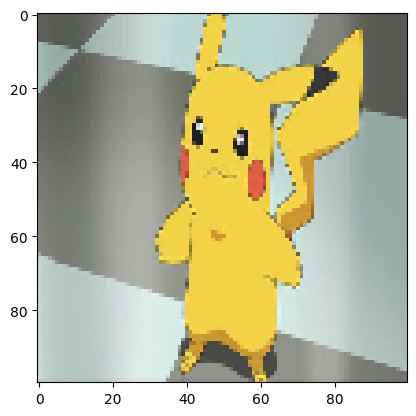

In [50]:
plt.imshow(img.astype('int'))

In [51]:
img = img.reshape(1, 30000)
img.shape

(1, 30000)

In [53]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 36ms/step


'Pikachu'